In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timezone

In [31]:
url="http://192.168.35.69/conex2tplink.txt"
df = pd.read_csv(url, sep='\t')
df = df.dropna()
df['momento'] = (pd.to_datetime(df['timestamp'], unit='s')- pd.Timedelta('04:30:00')).apply(lambda x: x.strftime("%d/%m/%Y %H:%M"))
df['momento'] = pd.to_datetime(df['momento'], format="%d/%m/%Y %H:%M")
print(df.shape)
df.tail()

(6260, 5)


,timestamp,N_conx,b_reci,b_env,momento
6256,1.612537e+09,21,218668575,363081951,2021-02-05 10:22:00
6257,1.612537e+09,23,220149633,365595263,2021-02-05 10:23:00
6258,1.612537e+09,22,220975417,366926098,2021-02-05 10:24:00
6259,1.612537e+09,21,221345558,369052683,2021-02-05 10:25:00
6260,1.612537e+09,19,221545363,371040935,2021-02-05 10:26:00


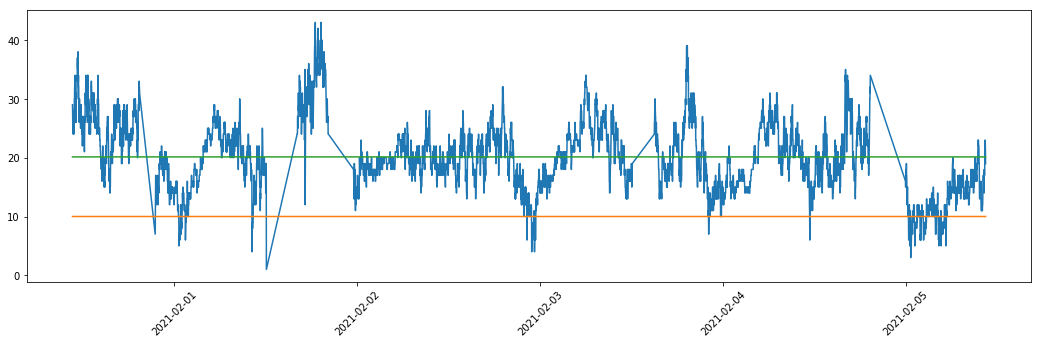

In [35]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from matplotlib import rcParams
import matplotlib.ticker as ticker
rcParams['figure.figsize'] = 18, 5
X = list(df.momento.values)
Y = list(df.N_conx.values)
Z = [10]*len(Y)
Z1 = [df.N_conx.mean()]*len(Y)

#ax = plt.axes()
#ax.xaxis.set_major_locator(ticker.MultipleLocator(len(X)//8))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(len(X)//4))

plt.plot(X, Y)
plt.plot(X,Z)
plt.plot(X,Z1)
#plt.gcf().autofmt_xdate()
plt.xticks(rotation= 45)
plt.show()



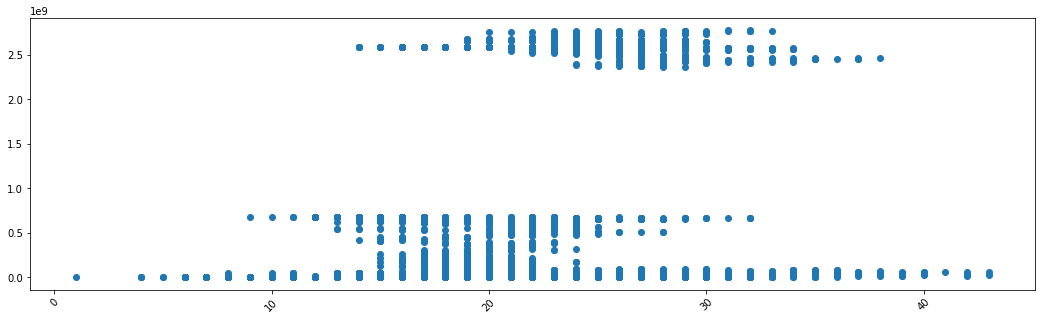

In [14]:
X = list(df.N_conx.values)
Y = list(df.b_reci.values)
#Z = list(df.b_env.values)
#Z1 = [df.N_conx.mean()]*len(Y)

#ax = plt.axes()
#ax.xaxis.set_major_locator(ticker.MultipleLocator(len(X)//8))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(len(X)//4))

plt.scatter(X, Y)
#plt.plot(X,Z)
#plt.yscale('log')

#plt.plot(X,Z1)
#plt.gcf().autofmt_xdate()
plt.xticks(rotation= 45)
plt.show()

In [5]:
df.columns

Index(['timestamp', 'N_conx', 'b_reci', 'b_env', 'momento'], dtype='object')